<a href="https://colab.research.google.com/github/anchal-rai/AnchalRai/blob/main/BagOfnGramsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# count vectorizer is a class
v=CountVectorizer()
v.fit(["Thor hathodawala is looking for a job"])
v.vocabulary_


{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [ ]:
# can give 1,2 or 1,3 or 2,3
v=CountVectorizer(ngram_range=(2,3))
v.fit(["Thor hathodawala  is looking for a job"])
v.vocabulary_

{'thor hathodawala': 7,
 'hathodawala is': 1,
 'is looking': 3,
 'looking for': 5,
 'for job': 0,
 'thor hathodawala is': 8,
 'hathodawala is looking': 2,
 'is looking for': 4,
 'looking for job': 6}

In [ ]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor loves groot and groot loves Iron man"])
v.vocabulary_

{'thor': 16,
 'loves': 10,
 'groot': 3,
 'and': 0,
 'iron': 8,
 'man': 15,
 'thor loves': 17,
 'loves groot': 11,
 'groot and': 4,
 'and groot': 1,
 'groot loves': 6,
 'loves iron': 13,
 'iron man': 9,
 'thor loves groot': 18,
 'loves groot and': 12,
 'groot and groot': 5,
 'and groot loves': 2,
 'groot loves iron': 7,
 'loves iron man': 14}

What is a Corpus?

In Natural Language Processing (NLP), a corpus refers to a collection of text data used for analysis and training language models. Think of it as a large dataset of text documents or sentences.


Why is a Corpus Important?

Training: Machine learning models in NLP need a corpus to learn patterns and relationships in language.
Analysis: Researchers use corpora to study language usage, frequencies of words, and grammatical structures.
Applications: Corpora are essential for tasks like text classification, sentiment analysis, and machine translation.

In [ ]:
corpus=["Thor ate pizza",
        "Hermoine is so cool",
        "Loki loves lauki"]

In [ ]:
import spacy
# load english language model and create nlp object

nlp=spacy.load("en_core_web_sm")
def process(text):
  # remove stop words
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return " ".join(filtered_tokens)

In [ ]:
process(" I am a pretty and smartest girl I love myself , Mai apni favourite hu")
# will do lemmatization will remove stop words

'  pretty smart girl love Mai apni favourite hu'

In [ ]:
corpus_processed=[
    process(text) for text in corpus
    ]
corpus_processed

['thor eat pizza', 'Hermoine cool', 'Loki love lauki']

In [ ]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 11,
 'eat': 1,
 'pizza': 10,
 'thor eat': 12,
 'eat pizza': 2,
 'hermoine': 3,
 'cool': 0,
 'hermoine cool': 4,
 'loki': 6,
 'love': 8,
 'lauki': 5,
 'loki love': 7,
 'love lauki': 9}

# CASE STUDY FOR APPLYING BAG OF N GRAMS

Steps to approach the project

1. Encoding
2. datset should be balanced (do feature Enginnering)
3.  in nlp uses small dataset(ie. create sample and then sample dummy) not the whole datset and if it gives good accuraccy then uses whole datset
4. tokenization, stopwords,pos,lemmatization, bag of words till pos i





In [ ]:
# importing libraries
#NEWS CATEGORY PROBLEM

import pandas as pd
df = pd.read_json("news_dataset.json")
print(df.shape)



(12695, 2)


In [ ]:
df.category.value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


In [ ]:
min_samples = 1381
df_business = df[df.category == "BUSINESS"].sample(min_samples,random_state=2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples,random_state=2022)
df_crime = df[df.category == "CRIME"].sample(min_samples,random_state=2022)
df_science=df[df.category=="SCIENCE"].sample(min_samples,random_state=2022)
# random state is always given bigger than the minimum number of rows


In [ ]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


In [ ]:
target={'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3}
df_balanced["category_num"]=df_balanced.category.map(target)
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


#BUILD A MODEL  PREPROCESSING THE DATA USING PIPELINE

An NLP Pipeline is a series of steps used to process text data for use in machine learning models. It typically involves stages such as:

Text Cleaning: Removing unwanted characters, HTML tags, punctuation, extra spaces.
Tokenization: Breaking down text into individual words or phrases (tokens).
Stop Word Removal: Removing common words (like "the," "a," "is") that don't contribute much to meaning.
Stemming or Lemmatization: Reducing words to their base forms (e.g., "running" to "run").
Feature Extraction: Transforming text into numerical representations (like Bag-of-Words, TF-IDF) for use in models.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,    # Changed 'test_Size' to 'test_size' 20% data of sample will go to test data
    random_state=2022,
    stratify=df_balanced.category_num

)

In [ ]:
print(X_train.shape)
X_train.head()

(4419,)


,text
7589,Ovulating Women Prefer Images of Penetration O...
10442,Scientists Discover Spooky Influence On Baby N...
8792,Olympic Race Walker Steps Up To Propose To His...
1733,Beloved Bipedal Bear Named Pedals Believed Kil...
2526,"Elizabeth Smart Gave Birth To Baby Girl, Fathe..."


In [ ]:
y_train.value_counts()

,count
category_num,
3,1105
2,1105
0,1105
1,1104


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# create a pipeline object


clf = Pipeline([('vectorizer_bow', CountVectorizer(ngram_range=(1, 1))),
                ('Multi NB', MultinomialNB())])  # Corrected class name and pipeline structure

# 2. fit with X_traiin and y_train

clf.fit(X_train,y_train)
# 3 get the predictions for X_test
y_pred=clf.predict(X_test)
# 4 print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       292
           1       0.91      0.86      0.88       301
           2       0.82      0.91      0.86       250
           3       0.88      0.84      0.86       262

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [ ]:
df_balanced['preprocessed_txt']=df_balanced.text.apply(process)
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_balanced['preprocessed_txt'],df_balanced.category_num,test_size=0.2)

clf = Pipeline([
                ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))),

                ('Multi NB',MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# 4 print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       292
           1       0.92      0.87      0.89       301
           2       0.82      0.92      0.86       250
           3       0.92      0.81      0.86       262

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# create a pipeline object

# clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range=(1,1)))('Multi NB',MultinomialNB())])
clf = Pipeline([('vectorizer_bow', CountVectorizer(ngram_range=(1, 3))),
                ('Multi NB', MultinomialNB())])  # Corrected class name and pipeline structure

# 2. fit with X_traiin and y_train

clf.fit(X_train,y_train)
# 3 get the predictions for X_test
y_pred=clf.predict(X_test)
# 4 print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       274
           1       0.93      0.87      0.90       271
           2       0.89      0.91      0.90       279
           3       0.92      0.85      0.88       281

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



# CONCLUSION

1. data shuld be balanced and uncertanity free
2. after preprocessing bi and tri is  has highest accurracy


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[251,   6,   9,   8],
       [ 15, 237,  13,   6],
       [ 13,   6, 254,   6],
       [ 30,   5,   8, 238]])

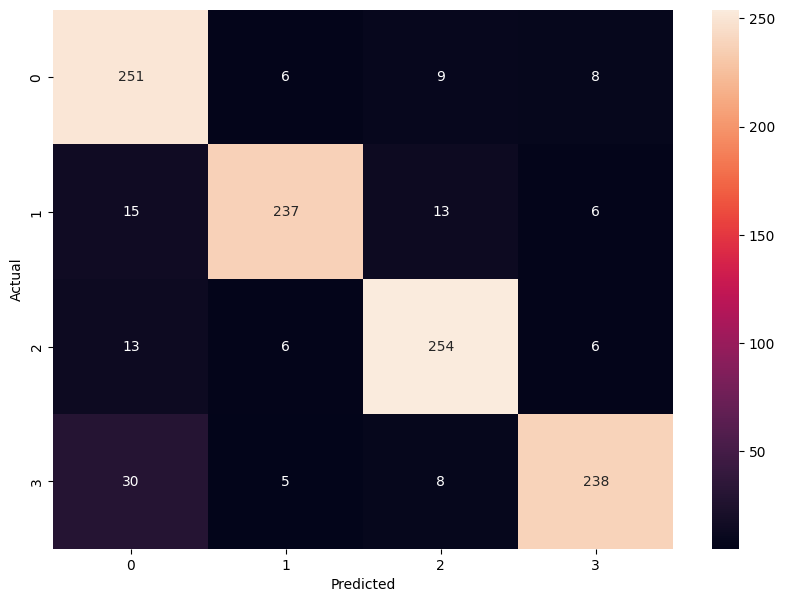

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()